# Traffic Sign Recognition using CNN

The goal  is to train a multiclass classifier to recognize traffic signs.
1.German Traffic Sign Recognition Benchmark (GTSRB) dataset
2.CNN


To arrive at such a multiclass classifier, we need to perform the following steps
1. Preprocess the dataset:
2. Extract features:
3. Train the classifier:
4. Score the classifier:**

importing Libraries

In [13]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

importing datasets

In [14]:
import os
print(os.listdir('../input/gtsrb-german-traffic-sign/'))


['Test', 'Train', 'Test.csv', 'Meta', 'train', 'Meta.csv', 'meta', 'test', 'Train.csv']


In [15]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]
height = 30
width = 30
channels = 3
num_classes = 43
n_inputs = height * width*channels
for i in range(num_classes) :
    s="../input/gtsrb-german-traffic-sign/train/{0}/".format(i)
    print(s)
    imageset=os.listdir(s)
    for imgs  in imageset:
        image=cv2.imread(s+imgs)
        i_array = Image.fromarray(image, 'RGB')
        size = i_array.resize((height, width))
        data.append(np.array(size))
        labels.append(i)

../input/gtsrb-german-traffic-sign/train/0/
../input/gtsrb-german-traffic-sign/train/1/
../input/gtsrb-german-traffic-sign/train/2/
../input/gtsrb-german-traffic-sign/train/3/
../input/gtsrb-german-traffic-sign/train/4/
../input/gtsrb-german-traffic-sign/train/5/
../input/gtsrb-german-traffic-sign/train/6/
../input/gtsrb-german-traffic-sign/train/7/
../input/gtsrb-german-traffic-sign/train/8/
../input/gtsrb-german-traffic-sign/train/9/
../input/gtsrb-german-traffic-sign/train/10/
../input/gtsrb-german-traffic-sign/train/11/
../input/gtsrb-german-traffic-sign/train/12/
../input/gtsrb-german-traffic-sign/train/13/
../input/gtsrb-german-traffic-sign/train/14/
../input/gtsrb-german-traffic-sign/train/15/
../input/gtsrb-german-traffic-sign/train/16/
../input/gtsrb-german-traffic-sign/train/17/
../input/gtsrb-german-traffic-sign/train/18/
../input/gtsrb-german-traffic-sign/train/19/
../input/gtsrb-german-traffic-sign/train/20/
../input/gtsrb-german-traffic-sign/train/21/
../input/gtsrb-germa

After preprocessing images we need to split the images.by using train_test_split

In [16]:
x_train=np.array(data)
x_train= x_train/255.0
y_train=np.array(labels)
y_train=keras.utils.to_categorical(y_train,num_classes)

In [17]:
# Spli|t Data
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)
print("Train :", X_train.shape)
print("Test :", X_test.shape)

Train : (27446, 30, 30, 3)
Test : (11763, 30, 30, 3)


Train images


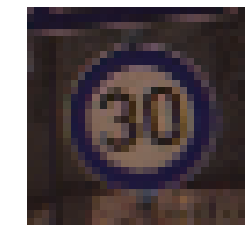

Size of this image is (30, 30, 3)
Class of the image is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


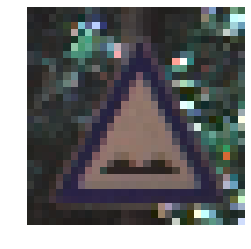

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


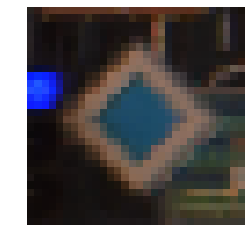

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
# Show Train images
import matplotlib.pyplot as plt

def display_images(images, labels, amount):
    for i in range(amount):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()       
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

print("Train images")
display_images(X_train, Y_train, 3)

In [19]:
# Build Model
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)         

In [20]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Train Model
epochs = 15
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=epochs,verbose=1)

Train on 27446 samples, validate on 11763 samples
Epoch 1/15
27446/27446 [==============================] - 7s 247us/sample - loss: 1.5628 - accuracy: 0.5468 - val_loss: 0.2515 - val_accuracy: 0.9217
Epoch 2/15
27446/27446 [==============================] - 6s 214us/sample - loss: 0.3354 - accuracy: 0.8955 - val_loss: 0.1017 - val_accuracy: 0.9728
Epoch 3/15
27446/27446 [==============================] - 6s 211us/sample - loss: 0.1909 - accuracy: 0.9411 - val_loss: 0.0523 - val_accuracy: 0.9850
Epoch 4/15
27446/27446 [==============================] - 6s 221us/sample - loss: 0.1402 - accuracy: 0.9566 - val_loss: 0.0408 - val_accuracy: 0.9878
Epoch 5/15
27446/27446 [==============================] - 6s 219us/sample - loss: 0.1077 - accuracy: 0.9667 - val_loss: 0.0335 - val_accuracy: 0.9902
Epoch 6/15
27446/27446 [==============================] - 6s 213us/sample - loss: 0.0926 - accuracy: 0.9708 - val_loss: 0.0276 - val_accuracy: 0.9923
Epoch 7/15
27446/27446 [==========================

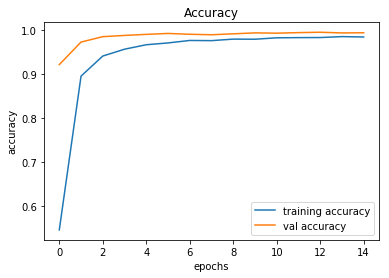

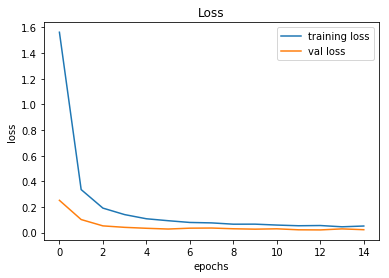

In [22]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt
from keras import models

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [23]:
# Predicting Test data 
y_test=pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../input/gtsrb-german-traffic-sign/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255  
pred = model.predict_classes(X_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9673792557403009

This is the Final accuracy of the model